## Random numbers from an arbitrary distribution


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import scipy.integrate as integrate

In [19]:
# define a distribution
def f(x):
    # return 0 if x = 0
    num = x**2
    den = np.exp(x) - 1
    return np.divide(num, den, out=np.zeros_like(num), where=den!=0)

In [20]:
def get_random(f, xmin, xmax, n_samples):
    """Generate n_samples random numbers within range [xmin, xmax]
    from arbitrary continuous function f
    using inverse transform sampling
    """

    # number of points for which we evaluate F(x)
    nbins = 10000

    # indefinite integral F(x), normalize to unity at xmax
    x = np.linspace(xmin, xmax, nbins+1)
    #F = integrate.cumtrapz(f(x), x, initial=0)
    F = integrate.cumulative_trapezoid(f(x), x, initial=0)
    F = F / F[-1]

    # interpolate F^{-1} and evaluate it for
    # uniformly distributed rv's in [0,1[
    inv_F = interpolate.interp1d(F, x, kind="quadratic")
    r = np.random.rand(n_samples)
    return inv_F(r)

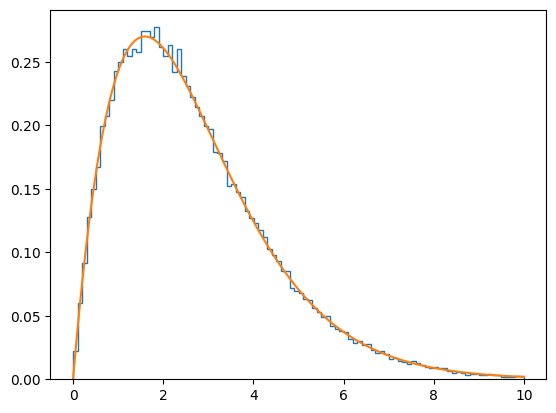

In [21]:
from scipy import integrate
ran = get_random(f, 0., 10., 100000)
plt.hist(ran, bins = 100, histtype='step', density=True);
x = np.linspace(0, 10, 1000)
norm, norm_err = integrate.quad(f, 0., 10.)
plt.plot(x, 1/norm * f(x));